In [34]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
filename = "/Users/matthewpotts/Downloads/dc/3766.jpg"


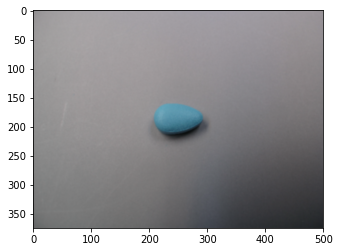

In [35]:
W = 500.
oriimg = cv2.imread(filename)
height, width, depth = oriimg.shape
imgScale = W/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
image = cv2.resize(oriimg,(int(newX),int(newY)))
plt.imshow(image, interpolation = 'bicubic')

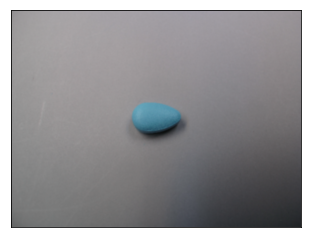

In [36]:
#cv2.imshow("im", image)
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

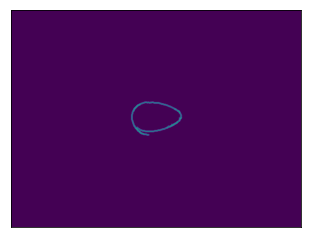

In [37]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(image, 100, 250)
plt.imshow(edged, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [38]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), [array([[[230, 160]],
  
         [[229, 161]],
  
         [[227, 161]],
  
         [[226, 162]],
  
         [[224, 162]],
  
         [[223, 163]],
  
         [[222, 163]],
  
         [[221, 164]],
  
         [[220, 164]],
  
         [[219, 165]],
  
         [[218, 165]],
  
         [[212, 171]],
  
         [[212, 172]],
  
         [[211, 173]],
  
         [[211, 174]],
  
         [[210, 175]],
  
         [[210, 176]],
  
         [[209, 177]],
  
         [[209, 180]],
  
         [[208, 181]],
  
         [[208, 190]],
  
         [[209, 191]],
  
         [[209, 193]],
  
         [[210, 194]],
  
         [[210, 196]],
  
         [[211, 197]],
  
         [[211, 199]],
  
         [[212, 200]],
  
         [[212, 201]],
  
         [[214, 203]]

In [39]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
idx = 0
for c in cnts:
	x,y,w,h = cv2.boundingRect(c)
	if w>10 and h>10:
		idx+=1
		new_img = image[y:y+h,x:x+w]
		cv2.imwrite('/Users/matthewpotts/Pills-with-Siamese-Networks/test_crop/' + filename[-8:-4] + '.jpg', new_img)


TypeError: points is not a numpy array, neither a scalar

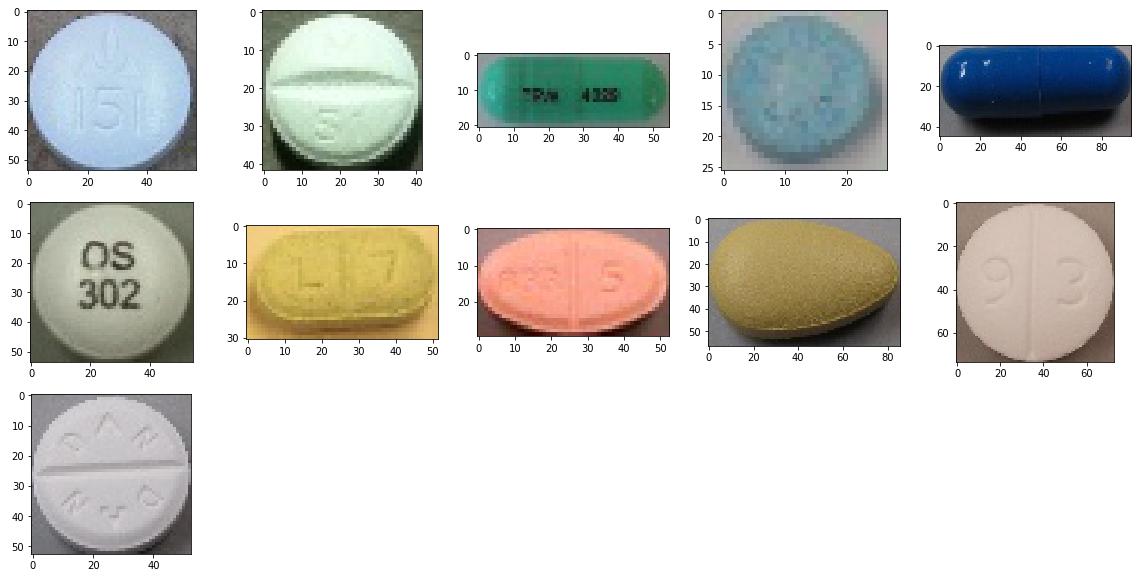

In [28]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('/Users/matthewpotts/Pills-with-Siamese-Networks/test_crop/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)